In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

In [149]:
df_bmw=pd.read_csv("bmw_pricing_v3.csv")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [150]:
# Cambiamos las columnas de fecha registro y fecha venta a tipo datetime.
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    

df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [151]:
# Eliminamos la columna de marca, ya que no nos aporta mucha información.
df_bmw.drop('marca',axis=1,inplace=True)

df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [152]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en un nuevo dataset. 
columnas_a_limpiar = ['modelo', 'km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio','fecha_venta']
df2_bmw = df_bmw.dropna(subset=columnas_a_limpiar)

df2_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       0
dtype: int64

In [153]:
df3_bmw = df2_bmw.copy()

<Axes: >

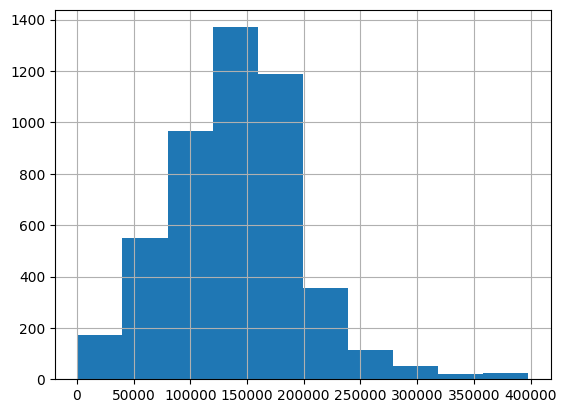

In [154]:
# Quitamos los outliers de la columna 'km'. 
df3_bmw.drop(df3_bmw[((df3_bmw["km"]<0) | (df3_bmw["km"]>400000))].index, inplace=True)

df3_bmw['km'].hist()

In [ ]:
# Bucle para ver en general las columnas. 
'''for i in df3_bmw:
  if (df3_bmw[i].dtype.kind == "O") or (df3_bmw[i].dtype.kind == "B"):
    print(i,'\n', df3_bmw[i].value_counts(), '\n')
  elif (df3_bmw[i].dtype.kind=="f") or (df3_bmw[i].dtype.kind=="i"):
    print(df3_bmw.hist(i))'''

In [155]:
df4_bmw = df3_bmw.copy()

<Axes: >

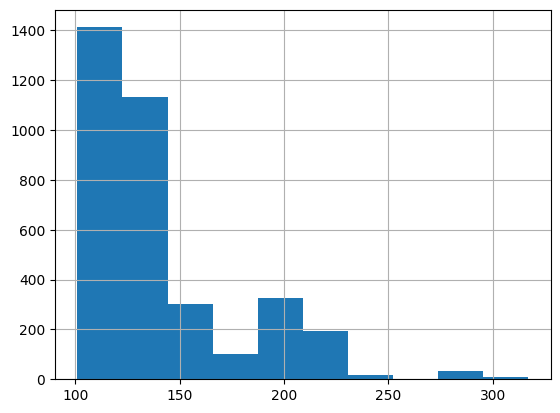

In [156]:
# Quitamos los outliers de la columna 'potencia'. 
df4_bmw.drop(df4_bmw[((df4_bmw["potencia"]<=100) | (df4_bmw["potencia"]>=400))].index, inplace=True)

df4_bmw['potencia'].hist()

<Axes: >

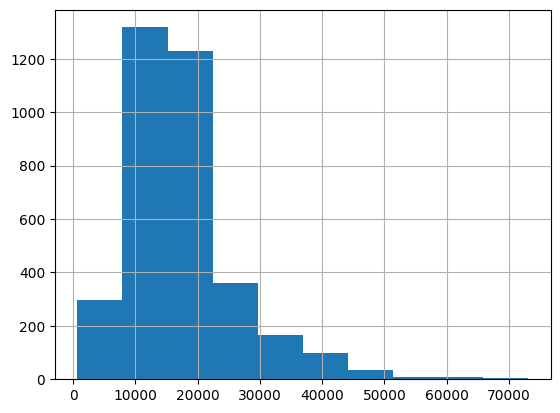

In [157]:
# Quitamos los outliers de la columna 'precio'. 
df4_bmw.drop(df4_bmw[((df4_bmw["precio"]<=100) | (df4_bmw["precio"]>=75000))].index, inplace=True)

df4_bmw['precio'].hist()

In [158]:
# Eliminamos la columna de fecha registro, ya que tenemos el 50 % de valores nulos. 
df4_bmw.drop('fecha_registro',axis=1,inplace=True)

df4_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           325
tipo_coche                     1046
volante_regulable                 0
aire_acondicionado              353
camara_trasera                    0
asientos_traseros_plegables    2472
elevalunas_electrico              0
bluetooth                       552
gps                               0
alerta_lim_velocidad            528
precio                            0
fecha_venta                       0
dtype: int64

In [159]:
# Cambiamos los valores nulos de las columnas de color y tipo coche, por 'sin especificar'.
df4_bmw["color"].fillna("sin especificar", inplace=True)
df4_bmw["tipo_coche"].fillna('sin especificar', inplace=True)

df4_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              353
camara_trasera                    0
asientos_traseros_plegables    2472
elevalunas_electrico              0
bluetooth                       552
gps                               0
alerta_lim_velocidad            528
precio                            0
fecha_venta                       0
dtype: int64

In [165]:
df5_bmw = df4_bmw.copy()

In [166]:
# Guardamos el dataframe en un pickle para así poder seguir el día siguiente sin tener que ejecutar todo. 
pd.to_pickle(df5_bmw,"C:/Users/mitev/Desktop/Simeon/NUCLIO DIGITAL SCHOOL/Entregables/Primer entregable/practica_entregable_Simeon_Mitev_PK")

In [28]:
# Ejecutamos el pickle y creamos una nueva variable. 
df_bmw_rec=pd.read_pickle("practica_entregable_Simeon_Mitev_PK")

In [29]:
df_bmw_rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3527 entries, 1 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       3527 non-null   object        
 1   km                           3527 non-null   float64       
 2   potencia                     3527 non-null   float64       
 3   tipo_gasolina                3527 non-null   object        
 4   color                        3527 non-null   object        
 5   tipo_coche                   3527 non-null   object        
 6   volante_regulable            3527 non-null   object        
 7   aire_acondicionado           3174 non-null   object        
 8   camara_trasera               3527 non-null   object        
 9   asientos_traseros_plegables  1055 non-null   object        
 10  elevalunas_electrico         3527 non-null   object        
 11  bluetooth                    2975 non-null   obj

In [30]:
df_bmw_rec.isnull().sum()


modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              353
camara_trasera                    0
asientos_traseros_plegables    2472
elevalunas_electrico              0
bluetooth                       552
gps                               0
alerta_lim_velocidad            528
precio                            0
fecha_venta                       0
dtype: int64

In [31]:
# Eliminamos la columna de asientos traseros plegables ya que tiene más valores nulos que valores con información. 
df_bmw_rec.drop('asientos_traseros_plegables',axis=1,inplace=True)

In [ ]:
hola

In [ ]:
# PRIMERA VISUALIZACIÓN DE CORRELACIONES ENTRE COLUMNAS 
corr = df_bmw_rec.corr()

corr.style.background_gradient(cmap='coolwarm')